In [9]:
from pathlib import Path

import ants
import corr
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.ndimage import sobel
import scipy
from skimage.metrics import structural_similarity as ssim
from tqdm import tqdm


In [2]:
pth = Path("../../data/low_movement/Experiment-746czi")


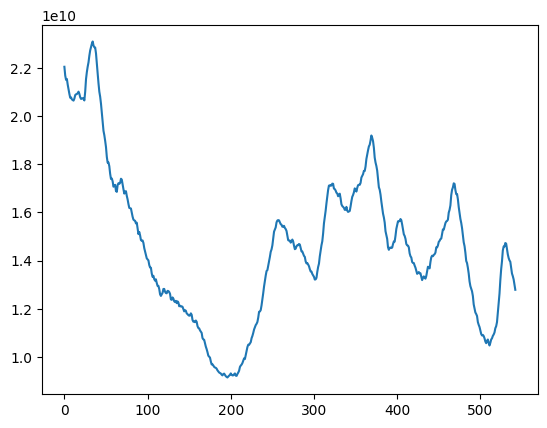

template_index=34


In [3]:
frame_paths = list(pth.glob("frame_*.tif"))
if not frame_paths:
    error_msg = f"No files found matching {pattern}"
    raise FileNotFoundError(error_msg)
frame_paths = [x.as_posix() for x in frame_paths]
frame_paths.sort()
frames = [np.array(Image.open(path)).astype(np.float32) for path in frame_paths]
frames = np.asarray(frames)
template_index = corr.find_highest_correlation(frames, plot=True)
print(f"{template_index=}")


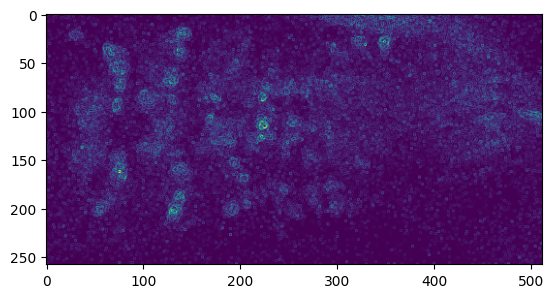

In [5]:
magnitude = corr.get_magnitude(template_float)
plt.imshow(magnitude)

In [6]:
ants_corrected = corr.ants_reg(frames, template_index)

100%|█████████████████████████████████████████████████████████████████████████████████████| 544/544 [11:39<00:00,  1.29s/it]


In [13]:
save_path = Path("../../data/cache/")
for i, arr in enumerate(ants_corrected):
    #image = image.astype("float32")
    image = Image.fromarray(arr)
    image.save((save_path / f"ants_{i}.tiff").as_posix())

In [14]:
ants_paths = list(save_path.glob("../../data/cache/ants*.tiff"))
ants_paths = [x.as_posix() for x in ants_paths]
ants_paths.sort()
ants_corrected = [ants.image_read(ants_path) for ants_path in ants_paths]

In [15]:
template = frames[template_index]


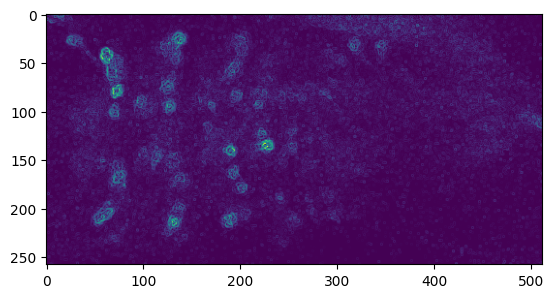

In [17]:
magnitude_template = corr.get_magnitude(template)
plt.imshow(magnitude_template)

In [19]:
template = frames[template_index]
mean_ssim, mean_gradient_ssim = corr.evaluate(ants_corrected, template)
print(f"{mean_ssim=}")
print(f"{mean_gradient_ssim=}")

  0%|                                                                                               | 0/544 [00:00<?, ?it/s]


ValueError: Input images must have the same dimensions.

In [20]:
mean_ssim, mean_gradient_ssim = corr.evaluate(ants_corrected, template)

  0%|                                                                                               | 0/544 [00:00<?, ?it/s]


ValueError: Input images must have the same dimensions.

In [ ]:
magnitude_template = corr.get_magnitude(template)
plt.imshow(magnitude_template)

In [ ]:
plt.imshow(template)

In [ ]:
np.std(mean_ssim)

In [ ]:
np.std(mean_gradient_ssim)

In [ ]:
np.median(mean_ssim)

In [ ]:
np.median(mean_gradient_ssim)